In [ ]:
limport warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

In [ ]:
litcovid_dataset = pd.read_csv('/content/drive/MyDrive/Biocreative/BC7-LitCovid-Train.csv')

In [ ]:
litcovid_dataset.head()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label
0,32519164,J Thromb Thrombolysis,Potential role for tissue factor in the pathog...,"In December 2019, a new and highly contagious ...",covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...,Journal Article;Review,"Bautista-Vargas, Mario;Bonilla-Abadia, Fabio;C...",10.1007/s11239-020-02172-x,Treatment;Mechanism
1,32691006,J Tradit Complement Med,Dietary therapy and herbal medicine for COVID-...,"A novel coronavirus disease (COVID-19), transm...",covid-19;coronavirus;dietary therapy;herbal me...,Journal Article;Review,"Panyod, Suraphan;Ho, Chi-Tang;Sheen, Lee-Yan",10.1016/j.jtcme.2020.05.004,Treatment;Prevention
2,32858315,J Affect Disord,First report of manic-like symptoms in a COVID...,"BACKGROUND: In December 2019, the novel corona...",cerebrospinal fluid;igg;manic-like symptoms;sa...,Case Reports;Journal Article,"Lu, Shaojia;Wei, Ning;Jiang, Jiajun;Wu, Lingli...",10.1016/j.jad.2020.08.031,Case Report
3,32985329,J Dent Res,Epidemiological Investigation of OHCWs with CO...,During the coronavirus disease 2019 (COVID-19)...,dental education;dental public health;infectio...,"Journal Article;Research Support, Non-U.S. Gov't","Meng, L;Ma, B;Cheng, Y;Bian, Z",10.1177/0022034520962087,Prevention
4,32812051,J Antimicrob Chemother,The impact of sofosbuvir/daclatasvir or ribavi...,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,NaN,Journal Article;Randomized Controlled Trial;Re...,"Eslami, Gholamali;Mousaviasl, Sajedeh;Radmanes...",10.1093/jac/dkaa331,Treatment


In [ ]:
# list of original columns:
Columns = list(litcovid_dataset.columns)
Columns

['pmid',
 'journal',
 'title',
 'abstract',
 'keywords',
 'pub_type',
 'authors',
 'doi',
 'label']

In [ ]:
# Total articles:
Length = litcovid_dataset['abstract'].shape[0]
print(f'# of articles: {Length}')

# of articles: 24960


In [ ]:
# Selecting first row:
litcovid_dataset.iloc[0]

pmid                                                 32519164
journal                                 J Thromb Thrombolysis
title       Potential role for tissue factor in the pathog...
abstract    In December 2019, a new and highly contagious ...
keywords    covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...
pub_type                               Journal Article;Review
authors     Bautista-Vargas, Mario;Bonilla-Abadia, Fabio;C...
doi                                10.1007/s11239-020-02172-x
label                                     Treatment;Mechanism
Name: 0, dtype: object

In [ ]:
# shape of dataframe
litcovid_dataset.shape

(24960, 9)

In [ ]:
# Report missing values
litcovid_dataset.isna().sum()

pmid           0
journal        0
title          0
abstract       0
keywords    5992
pub_type       0
authors      101
doi          554
label          0
dtype: int64

In [ ]:
import numpy as np

# Average length of articles:
# litcovid_dataset(pmid: abstract)
articles = pd.Series(litcovid_dataset.abstract.values,index=litcovid_dataset['pmid']).to_dict()

# litcovid_dataset(pmid: len(abstarct))
length =  dict((key, len(articles[key])) for key in articles.keys())

length_list = [values for key, values in length.items()]
length_list = np.array(length_list)

print(f'average length of abstract articles {np.mean(length_list)}')
print(f'max length of articles: {np.max(length_list), np.argmax(length_list)}')
print(f'min length of articles: {np.min(length_list), np.argmin(length_list)}')

average length of abstract articles 1377.4241586538462
max length of articles: (8284, 3479)
min length of articles: (1, 19175)


In [ ]:
word_length = [len(value.split(' ')) for key, value in articles.items()]
word_length = np.array(word_length)

print(f'average word length of abstract articles {np.mean(word_length)}')
print(f'max word length of articles: {np.max(word_length), np.argmax(word_length)}')
print(f'min word length of articles: {np.min(word_length), np.argmin(word_length)}')

average word length of abstract articles 199.09759615384615
max word length of articles: (1267, 3479)
min word length of articles: (1, 2644)


In [ ]:
sorted_indices = np.argsort(word_length)
sorted_list = word_length[sorted_indices]
print(f'Top k largest word length articles: {sorted_list[-10:]}')

Top k largest word length articles: [ 991  992  994 1039 1051 1097 1102 1136 1236 1267]


In [ ]:
count = 0
for i in sorted_list:
  if i > 512:
    count+=1
  
print(f'Value that will be deprecated during tokenzation of abstract articles: {count}')

Value that will be deprecated during tokenzation of abstract articles: 135


In [ ]:
litcovid_dataset.loc[19175, 'abstract']

'.'

In [ ]:
litcovid_dataset.loc[3479, 'abstract']

'OBJECTIVES: To assess the hypothesis that an adjunctive therapy with methylprednisolone and unfractionated heparin (UFH) or with methylprednisolone and low molecular weight heparin (LMWH) are more effective in reducing any-cause mortality in critically-ill ventilated patients with pneumonia from SARS-CoV-2 infection compared to LMWH alone. TRIAL DESIGN: The study is designed as a multi-centre, interventional, parallel group, superiority, randomized, investigator sponsored, three arms study. Patients, who satisfy all inclusion criteria and no exclusion criteria, will be randomly assigned to one of the three treatment groups in a ratio 1:1:1. PARTICIPANTS: Inpatients will be recruited from 8 Italian Academic and non-Academic Intensive Care Units INCLUSION CRITERIA (ALL REQUIRED): 1. Positive SARS-CoV-2 diagnostic (on pharyngeal swab of deep airways material) 2. Positive pressure ventilation (either non-invasive or invasive) from > 24 hours 3. Invasive mechanical ventilation from < 96 ho

In [ ]:
# Labels
Labels = pd.Series([labels.split(';') for labels in list(litcovid_dataset.label)],index=litcovid_dataset['pmid']).to_dict()

In [ ]:
# list all unique labels 
labels = []

for key, values in Labels.items():
  for label in values:
    if label not in labels:
      labels.append(label)
    
print(labels)

['Treatment', 'Mechanism', 'Prevention', 'Case Report', 'Diagnosis', 'Transmission', 'Epidemic Forecasting']


In [ ]:
# applying sklearn preprocessing.LabelEncoder()
from sklearn import preprocessing

Le = preprocessing.LabelEncoder()
Le.fit(['Treatment', 'Mechanism', 'Prevention', 'Case Report', 'Diagnosis', 'Transmission', 'Epidemic Forecasting'])
list(Le.classes_)

# Encoded version of Labels 
Encoded_labels = dict((key, Le.transform(values).tolist()) for key, values in Labels.items())

y = [tuple(values) for key, values in Encoded_labels.items()]

# Onehot encoding
from sklearn.preprocessing import MultiLabelBinarizer

onehot = MultiLabelBinarizer()

Encodings = onehot.fit_transform(y)

class_mappings = dict(zip(Le.classes_, onehot.classes_))

In [ ]:
litcovid_dataset.shape, Encodings.shape

((24960, 9), (24960, 7))

In [ ]:
# bifurcating classes

for key in class_mappings.keys():

  # Assigning new columns as labels and their respective boolean values
  # litcovid_dataset.insert(, key, Encodings[:, class_mappings[key]])
  litcovid_dataset[key] = Encodings[:, class_mappings[key]]

# Added 6 extra columns for different lables
litcovid_dataset.head()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,32519164,J Thromb Thrombolysis,Potential role for tissue factor in the pathog...,"In December 2019, a new and highly contagious ...",covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...,Journal Article;Review,"Bautista-Vargas, Mario;Bonilla-Abadia, Fabio;C...",10.1007/s11239-020-02172-x,Treatment;Mechanism,0,0,0,1,0,0,1
1,32691006,J Tradit Complement Med,Dietary therapy and herbal medicine for COVID-...,"A novel coronavirus disease (COVID-19), transm...",covid-19;coronavirus;dietary therapy;herbal me...,Journal Article;Review,"Panyod, Suraphan;Ho, Chi-Tang;Sheen, Lee-Yan",10.1016/j.jtcme.2020.05.004,Treatment;Prevention,0,0,0,0,1,0,1
2,32858315,J Affect Disord,First report of manic-like symptoms in a COVID...,"BACKGROUND: In December 2019, the novel corona...",cerebrospinal fluid;igg;manic-like symptoms;sa...,Case Reports;Journal Article,"Lu, Shaojia;Wei, Ning;Jiang, Jiajun;Wu, Lingli...",10.1016/j.jad.2020.08.031,Case Report,1,0,0,0,0,0,0
3,32985329,J Dent Res,Epidemiological Investigation of OHCWs with CO...,During the coronavirus disease 2019 (COVID-19)...,dental education;dental public health;infectio...,"Journal Article;Research Support, Non-U.S. Gov't","Meng, L;Ma, B;Cheng, Y;Bian, Z",10.1177/0022034520962087,Prevention,0,0,0,0,1,0,0
4,32812051,J Antimicrob Chemother,The impact of sofosbuvir/daclatasvir or ribavi...,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,NaN,Journal Article;Randomized Controlled Trial;Re...,"Eslami, Gholamali;Mousaviasl, Sajedeh;Radmanes...",10.1093/jac/dkaa331,Treatment,0,0,0,0,0,0,1


In [ ]:
# Labels Stats:
labels_dataframe = litcovid_dataset.filter(['Case Report', 'Diagnosis',	'Epidemic Forecasting',	'Mechanism',	'Prevention',	'Transmission', 'Treatment'], axis=1)

labels_dataframe.describe()

,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
count,24960.000000,24960.000000,24960.000000,24960.000000,24960.000000,24960.000000,24960.000000
mean,0.082652,0.248117,0.025841,0.177804,0.444792,0.043590,0.349239
std,0.275361,0.431929,0.158665,0.382356,0.496953,0.204185,0.476739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

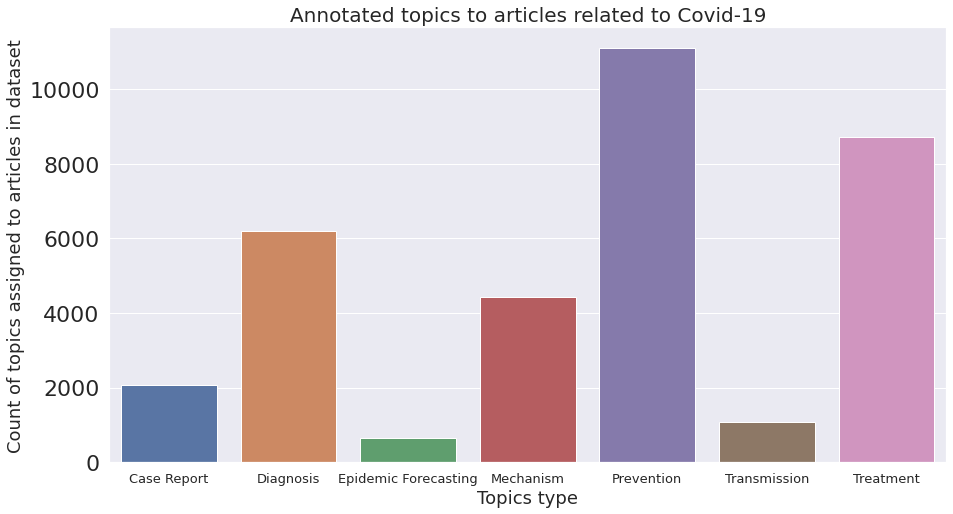

In [ ]:
categories = list(litcovid_dataset.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15, 8))

ax = sns.barplot(categories[9:], litcovid_dataset.iloc[:, 9:].sum().values)

plt.title("Annotated topics to articles related to Covid-19", fontsize=20)
plt.ylabel('Count of topics assigned to articles in dataset', fontsize=18)
plt.xlabel('Topics type', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)

plt.show()

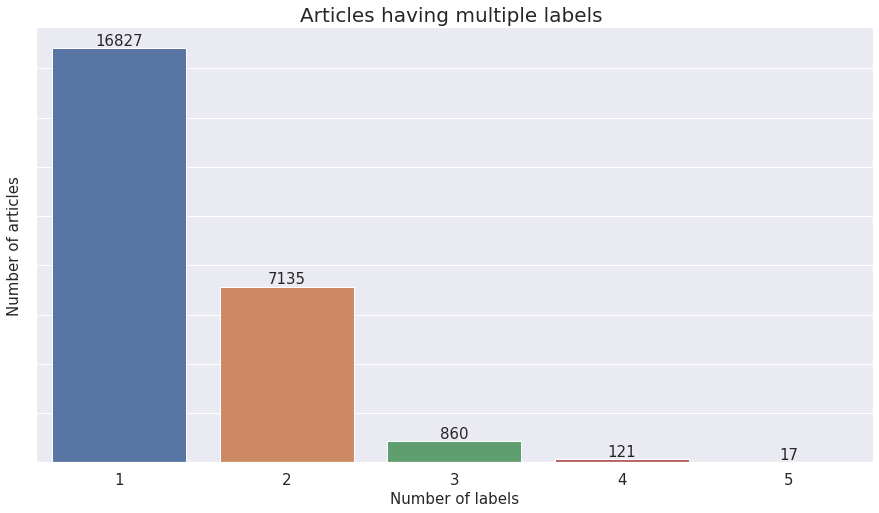

In [ ]:
rowSums = litcovid_dataset.iloc[:,9:].sum(axis=1)

multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Articles having multiple labels ", fontsize=20)
plt.ylabel('Number of articles', fontsize=15)
plt.xlabel('Number of labels', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=15)

plt.show()

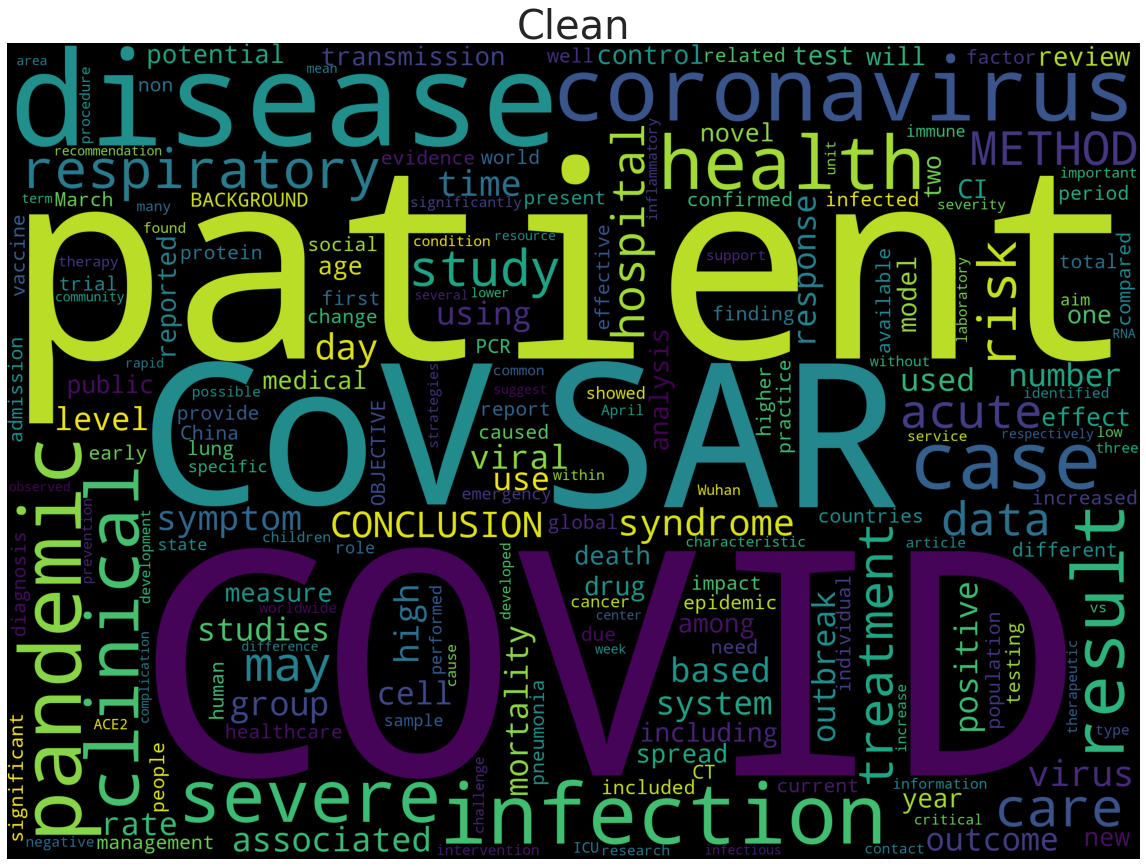

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(30,15))

text = litcovid_dataset.abstract.values
cloud_toxic = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    collocations=False,
    width=2500,
    height=1800).generate(" ".join(text))

plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)

In [ ]:
litcovid_dataset.head()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
0,32519164,J Thromb Thrombolysis,Potential role for tissue factor in the pathog...,"In December 2019, a new and highly contagious ...",covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...,Journal Article;Review,"Bautista-Vargas, Mario;Bonilla-Abadia, Fabio;C...",10.1007/s11239-020-02172-x,Treatment;Mechanism,0,0,0,1,0,0,1
1,32691006,J Tradit Complement Med,Dietary therapy and herbal medicine for COVID-...,"A novel coronavirus disease (COVID-19), transm...",covid-19;coronavirus;dietary therapy;herbal me...,Journal Article;Review,"Panyod, Suraphan;Ho, Chi-Tang;Sheen, Lee-Yan",10.1016/j.jtcme.2020.05.004,Treatment;Prevention,0,0,0,0,1,0,1
2,32858315,J Affect Disord,First report of manic-like symptoms in a COVID...,"BACKGROUND: In December 2019, the novel corona...",cerebrospinal fluid;igg;manic-like symptoms;sa...,Case Reports;Journal Article,"Lu, Shaojia;Wei, Ning;Jiang, Jiajun;Wu, Lingli...",10.1016/j.jad.2020.08.031,Case Report,1,0,0,0,0,0,0
3,32985329,J Dent Res,Epidemiological Investigation of OHCWs with CO...,During the coronavirus disease 2019 (COVID-19)...,dental education;dental public health;infectio...,"Journal Article;Research Support, Non-U.S. Gov't","Meng, L;Ma, B;Cheng, Y;Bian, Z",10.1177/0022034520962087,Prevention,0,0,0,0,1,0,0
4,32812051,J Antimicrob Chemother,The impact of sofosbuvir/daclatasvir or ribavi...,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,NaN,Journal Article;Randomized Controlled Trial;Re...,"Eslami, Gholamali;Mousaviasl, Sajedeh;Radmanes...",10.1093/jac/dkaa331,Treatment,0,0,0,0,0,0,1


In [ ]:
litcovid_dataset.tail()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label,Case Report,Diagnosis,Epidemic Forecasting,Mechanism,Prevention,Transmission,Treatment
24955,32508388,Biol Sport,Medical recommendations for home-confined foot...,"In early 2020, the world is facing a global em...",coronavirus;football;illness;soccer;training,Journal Article;Review,"Eirale, Cristiano;Bisciotti, Giannicola;Corsin...",10.5114/biolsport.2020.94348,Prevention,0,0,0,0,1,0,0
24956,32815519,Diagn Interv Radiol,Determination of disease severity in COVID-19 ...,PURPOSE: Chest X-ray plays a key role in diagn...,NaN,Journal Article,"Blain, Maxime;T Kassin, Michael;Varble, Nicole...",10.5152/dir.2020.20205,Diagnosis,0,1,0,0,0,0,0
24957,32904987,New Microbes New Infect,Baseline electrolyte abnormalities would be re...,Electrolyte abnormalities are not uncommon in ...,coronavirus disease 2019;disease outcome;elect...,Journal Article,"Tezcan, M E;Dogan Gokce, G;Sen, N;Zorlutuna Ka...",10.1016/j.nmni.2020.100753,Treatment;Diagnosis,0,1,0,0,0,0,1
24958,32892181,J Perinat Med,COVID-19 in obstetrics 2020: the experience at...,The global spread of the SARS-CoV-2 virus duri...,covid-19;sars-cov-2;health system resources;ob...,Journal Article;Review,"Dayal, Ashlesha K;Razavi, Armin S;Jaffer, Amir...",10.1515/jpm-2020-0365,Prevention,0,0,0,0,1,0,0
24959,32389144,Disaster Med Public Health Prep,Public Health Communication in Time of Crisis:...,OBJECTIVE: The purpose of this study was to as...,covid-19;on-line information;readability,Journal Article;Review,"Basch, Corey H;Mohlman, Jan;Hillyer, Grace C;G...",10.1017/dmp.2020.151,Prevention,0,0,0,0,1,0,0


In [ ]:
litcovid_dataset.to_csv(r"/content/drive/MyDrive/Biocreative/litcovid_dataset.csv", index=False, header=True)